In [1]:
#Hello (again)! This is my first attempt at learning data analysis in Python!

In [2]:
#I'm following along with this tutorial: https://www.youtube.com/watch?v=r-uOLxNrNk8, https://www.youtube.com/watch?v=eMOA1pPVUc4

In [3]:
import pandas as pd
import os

### Merging 12 months of data into a single file

In [4]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
# df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

In [6]:
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

In [57]:
# df.head()
all_months_data.head()
# all_months_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [8]:
all_months_data.shape

(186850, 6)

### Read in updated Data Frame

In [9]:
all_months_data.to_csv("all_data.csv", index = False)
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Clean up the data!

In [10]:
pd.isnull(all_data).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
pd.isnull(all_data).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Drop rows of Nan

In [12]:
nan_df = all_data[all_data.isnull().any(axis=1)]

In [13]:
all_data = all_data.dropna(how='all')

In [14]:
nan_df.head()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Find "or" and remove it

In [15]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Augment Data with additional columns

#### Add month column

In [17]:
all_data["Month"] = all_data["Order Date"].str[:2].astype('int32')
#NaN error!
#invalid literal error!

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Convert columns to correct datatype

In [19]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #all_data["Quantity Ordered"].astype('int')

In [20]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])#all_data["Price Each"].astype('float')

#### Add a Sales column

In [21]:
 all_data["Sale"] = all_data["Quantity Ordered"] * all_data["Price Each"]

# What was the best month in sales? How much was earned?

In [22]:
monthly = all_data.groupby("Month").sum()

##### The Answer is December! 4.6 mil was earned in December.

### Visualizing Data

Text(0.5, 0, 'Month #')

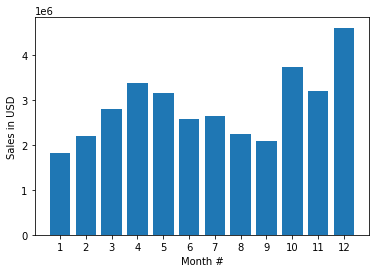

In [23]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, monthly['Sale'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month #')

### What city had the highest number of sales?

#### Create new city column

In [24]:
#using .apply!
def get_city(address):
    return address.split(',')[1]

def get_city_state(address):
    city = address.split(',')[1]
    state = str(address.split(',')[2])[:3]
    return city + ',' + state

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city_state(x))

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [26]:
city_wide = all_data.groupby("City").sum()
city_wide.head(10)

,Quantity Ordered,Price Each,Month,Sale
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


In [27]:
type(city_wide.shape)

tuple

In [28]:
no_of_cities = range(city_wide.shape[0])
cities = all_data['City'].unique()

Text(0.5, 0, 'City names')

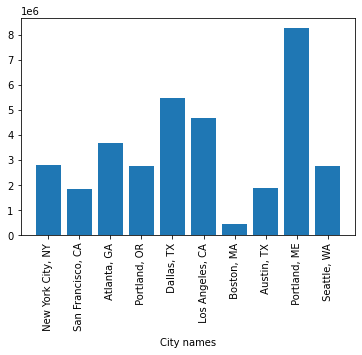

In [29]:
plt.bar(cities, city_wide['Sale'])
# plt.xticks(city for city in city_wide['City'])
# plt.xticks(city for city in city_wide.loc['City'])
plt.xticks(cities, rotation = 'vertical')
# plt.ylabel('# of Sales')
plt.xlabel('City names')


#### It's broken!

In [30]:
cities = [city for city, df in all_data.groupby("City")]

Text(0, 0.5, 'Sales in millions')

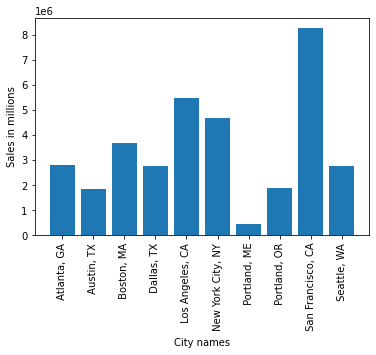

In [31]:
plt.bar(cities, city_wide['Sale'])
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('City names')
plt.ylabel('Sales in millions')

#### It's fixed!!!

# What time of day should we advertise to maximize likelihood of product purchase?

In [32]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [34]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


Text(0, 0.5, '# of orders')

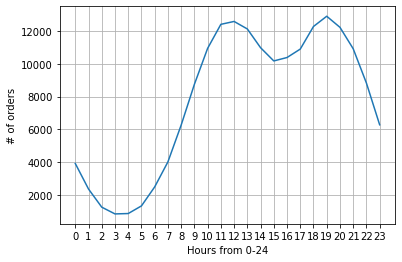

In [36]:
hourly = all_data.groupby("Hour").count()
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, hourly['Sale'])

plt.xticks(hours)
plt.grid()
plt.xlabel('Hours from 0-24')
plt.ylabel('# of orders')

# What products are most often sold together?

#### Create a smaller df with only duplicate order IDs

In [37]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
# df

#### Group orders by ID with .transform()

In [38]:
df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df.head()

/var/folders/r4/qqq4_g3s50173_4l3rk6jj1w0000gn/T/ipykernel_27462/466393237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32,"Vareebadd Phone,USB-C Charging Cable"


In [39]:
# df = df[df['Order ID', 'Grouped'].duplicated(keep='first')]
df = df[['Order ID', 'Grouped']].drop_duplicates()
# df

#### His way:

In [60]:
from itertools import combinations
from collections import Counter

#### My way:

In [59]:
from collections import defaultdict

In [47]:
Orders = defaultdict(lambda: 0)

for order in df['Grouped']:
#     print(type(order))
    order = order.split(',')
#     print(order)
    Orders[frozenset(order)] += 1
    

In [58]:
# print(Orders)
(sorted(Orders.values(), reverse=True)[0])

895

In [54]:
most_frequent_order = max(Orders, key=Orders.get)
(most_frequent_order, Orders[most_frequent_order])

(frozenset({'Lightning Charging Cable', 'iPhone'}), 895)

#### My way only returns the times someone only ordered a lightning cable and iphone, it'd be better if it returned every time someone ordered a lightning cable, iphone, and anything else

### What product sold the most? Why?

In [70]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

In [72]:
products = [product for product, df in product_group]

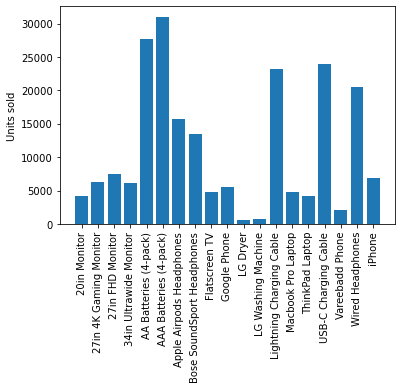

In [80]:
plt.bar(products, quantity_ordered)
plt.ylabel('Units sold')
plt.xticks(products, rotation='vertical')
plt.show()

#### Overlay prices on Units Sold graph to determine accuracy of cost correlation with sales

In [81]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/r4/qqq4_g3s50173_4l3rk6jj1w0000gn/T/ipykernel_27462/645380996.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


Text(0, 0.5, 'Price in USD')

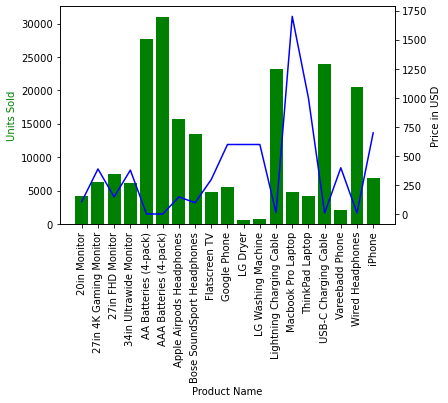

In [91]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Units Sold', color='g')
ax2.set_ylabel('Price in USD')